In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [137]:
AVAILABLE_MODELS = {
    'DECISION_TREE': DecisionTreeClassifier(),
    'RANDOM_FOREST': RandomForestClassifier(n_estimators=100),
    'NEURAL_NETWORK': MLPClassifier(max_iter=1000),
    'K_NEIGHBORS': KNeighborsClassifier(),
    'SUPPORT_VECTOR_MACHINE': SVC(),
    #'GAUSSIAN_PROCESS': GaussianProcessClassifier(1.0 * RBF(1.0)), # to trwa tak z 2 lata nauka, wywalam xD
    'ADABOOST': AdaBoostClassifier(learning_rate=0.55),
    'NAIVE_BAYES': GaussianNB(),
    'QUADRATIC_DISCRIMINANT_ANALYSIS': QuadraticDiscriminantAnalysis()
}

In [138]:
def build_model_return_predictions(model, train_samples, train_classes, test_samples):
    classifier = model.fit(train_samples, train_classes)
    return classifier.predict(test_samples), classifier

def calculate_metrics(y_true, y_pred):
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['precision'] = precision_score(y_true, y_pred)
    metrics['recall'] = recall_score(y_true, y_pred)
    metrics['f1_score'] = f1_score(y_true, y_pred)
    return metrics

In [139]:
illegitimate_df = pd.read_csv('../../data/illegitimate_data.csv')
#illegitimate_df = illegitimate_df.dropna(subset=['tls_age'])
#illegitimate_df = illegitimate_df.dropna(subset=['tls_issuer'])
#illegitimate_df = illegitimate_df.dropna(subset=['is_redirect'])
illegitimate_df

,tld,registrar,registrant_country,domain_age,nameserver_domain,mail_domain,tls_age,tls_issuer,url_len,parameters_len,...,opening_bracket_percent,closing_bracket_percent,comma_percent,numbers_percent,url_entropy,is_redirect,subdomain_count,content_link_count,content_img_count,label
0,shop,Registrar of domain names REG.RU,RU,5.0,reg.ru,reg.ru,5.0,R3,21,0,...,0.0,0.0,0.0,0,3.558519,True,2,44.0,17.0,illegitimate
1,com,"NameSilo, LLC",US,89.0,cloudflare.com,namesilo.com,NaN,NaN,21,0,...,0.0,0.0,0.0,0,3.594466,False,2,0.0,0.0,illegitimate
2,com,"NameSilo, LLC",US,89.0,cloudflare.com,namesilo.com,7.0,E1,197,154,...,0.0,0.0,0.0,60,4.897371,True,2,0.0,0.0,illegitimate
3,com,"NameSilo, LLC",US,89.0,cloudflare.com,namesilo.com,6.0,GTS CA 1P5,210,154,...,0.0,0.0,0.0,56,4.990006,True,2,0.0,0.0,illegitimate
4,com,"NameSilo, LLC",US,89.0,cloudflare.com,namesilo.com,6.0,E1,206,154,...,0.0,0.0,0.0,64,4.966357,True,2,0.0,0.0,illegitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,xyz,"Registrar of Domain Names REG.RU, LLC",PL,1.0,cloudflare.com,reg.ru,NaN,NaN,34,0,...,0.0,0.0,0.0,8,4.079679,True,3,1.0,1.0,illegitimate
11109,xyz,"Registrar of Domain Names REG.RU, LLC",PL,1.0,cloudflare.com,reg.ru,1.0,GTS CA 1P5,43,0,...,0.0,0.0,0.0,10,4.518833,False,3,0.0,0.0,illegitimate
11110,site,"Name.com, Inc",UA,253.0,name.com,name.com,NaN,NaN,32,0,...,0.0,0.0,0.0,0,3.965018,False,3,0.0,8.0,illegitimate
11111,site,"Name.com, Inc",UA,253.0,name.com,name.com,NaN,NaN,33,0,...,0.0,0.0,0.0,0,4.089552,False,3,0.0,8.0,illegitimate


In [140]:
legitimate_df = pd.read_csv('../../data/legitimate_data.csv')
legitimate_df.drop('url', axis=1, inplace=True)
legitimate_df

,tld,registrar,registrant_country,domain_age,nameserver_domain,mail_domain,tls_age,tls_issuer,url_len,parameters_len,...,opening_bracket_percent,closing_bracket_percent,comma_percent,numbers_percent,url_entropy,is_redirect,subdomain_count,content_link_count,content_img_count,label
0,org,DreamHost LLC,US,6334.0,dreamhost.com,NaN,NaN,NaN,27,0,...,0.0,0.0,0.0,0.00000,3.912114,False,1,4.0,11.0,legitimate
1,org,Webcentral Group Limited dba Melbourne IT (Aus...,AU,7978.0,afraid.org,NaN,NaN,NaN,49,0,...,0.0,0.0,0.0,0.00000,4.057961,False,1,0.0,18.0,legitimate
2,org,Webcentral Group Limited dba Melbourne IT (Aus...,AU,7978.0,afraid.org,NaN,NaN,NaN,48,0,...,0.0,0.0,0.0,0.00000,4.130995,False,1,0.0,18.0,legitimate
3,fr,GIP RENATER,NaN,10390.0,polytechnique.fr,NaN,NaN,NaN,81,0,...,0.0,0.0,0.0,0.00000,4.609257,False,2,0.0,0.0,legitimate
4,com,"Network Solutions, LLC",US,8697.0,dns-solutions.net,NaN,NaN,NaN,31,0,...,0.0,0.0,0.0,0.00000,3.760017,False,1,59.0,54.0,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,com,"NameSilo, LLC",US,1421.0,cloudflare.com,namesilo.com,3.0,Google Trust Services LLC,30,0,...,0.0,0.0,0.0,0.00000,4.056565,False,1,43.0,80.0,legitimate
3431,academy,"NameCheap, Inc.",IS,2567.0,registrar-servers.com,withheldforprivacy.com,11.0,Let's Encrypt,79,0,...,0.0,0.0,0.0,0.00000,4.206024,False,1,0.0,0.0,legitimate
3432,com,Tucows Domains Inc.,CA,7487.0,cloudflare.com,tucows.com,101.0,"Cloudflare, Inc.",61,0,...,0.0,0.0,0.0,11.47541,4.587895,False,1,19.0,346.0,legitimate
3433,com,"GoDaddy.com, LLC",US,3503.0,cloudflare.com,godaddy.com,165.0,"Cloudflare, Inc.",81,0,...,0.0,0.0,0.0,0.00000,4.197393,False,1,NaN,NaN,legitimate


In [141]:
all_df = pd.concat([illegitimate_df, legitimate_df])
all_df

,tld,registrar,registrant_country,domain_age,nameserver_domain,mail_domain,tls_age,tls_issuer,url_len,parameters_len,...,opening_bracket_percent,closing_bracket_percent,comma_percent,numbers_percent,url_entropy,is_redirect,subdomain_count,content_link_count,content_img_count,label
0,shop,Registrar of domain names REG.RU,RU,5.0,reg.ru,reg.ru,5.0,R3,21,0,...,0.0,0.0,0.0,0.00000,3.558519,True,2,44.0,17.0,illegitimate
1,com,"NameSilo, LLC",US,89.0,cloudflare.com,namesilo.com,NaN,NaN,21,0,...,0.0,0.0,0.0,0.00000,3.594466,False,2,0.0,0.0,illegitimate
2,com,"NameSilo, LLC",US,89.0,cloudflare.com,namesilo.com,7.0,E1,197,154,...,0.0,0.0,0.0,60.00000,4.897371,True,2,0.0,0.0,illegitimate
3,com,"NameSilo, LLC",US,89.0,cloudflare.com,namesilo.com,6.0,GTS CA 1P5,210,154,...,0.0,0.0,0.0,56.00000,4.990006,True,2,0.0,0.0,illegitimate
4,com,"NameSilo, LLC",US,89.0,cloudflare.com,namesilo.com,6.0,E1,206,154,...,0.0,0.0,0.0,64.00000,4.966357,True,2,0.0,0.0,illegitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,com,"NameSilo, LLC",US,1421.0,cloudflare.com,namesilo.com,3.0,Google Trust Services LLC,30,0,...,0.0,0.0,0.0,0.00000,4.056565,False,1,43.0,80.0,legitimate
3431,academy,"NameCheap, Inc.",IS,2567.0,registrar-servers.com,withheldforprivacy.com,11.0,Let's Encrypt,79,0,...,0.0,0.0,0.0,0.00000,4.206024,False,1,0.0,0.0,legitimate
3432,com,Tucows Domains Inc.,CA,7487.0,cloudflare.com,tucows.com,101.0,"Cloudflare, Inc.",61,0,...,0.0,0.0,0.0,11.47541,4.587895,False,1,19.0,346.0,legitimate
3433,com,"GoDaddy.com, LLC",US,3503.0,cloudflare.com,godaddy.com,165.0,"Cloudflare, Inc.",81,0,...,0.0,0.0,0.0,0.00000,4.197393,False,1,NaN,NaN,legitimate


## Zamiana feature'ów tekstowych na liczbowe

In [142]:
all_df_ml_ready = all_df.copy()
#TODO możliwe że tu trzeba inaczej zamienić na liczbowe - nie wiem czy to jest ok, ktoś musi sprawdzić
all_df_ml_ready['label'] = all_df_ml_ready['label'].replace({'illegitimate': 1, 'legitimate': 0})
all_df_ml_ready = all_df_ml_ready.fillna(-1)
for col in all_df_ml_ready.columns:
    if all_df_ml_ready[col].dtype == object:  # Only apply to object (string) columns
        labels, uniques = pd.factorize(all_df_ml_ready[col])
        all_df_ml_ready[col] = labels
all_df_ml_ready

,tld,registrar,registrant_country,domain_age,nameserver_domain,mail_domain,tls_age,tls_issuer,url_len,parameters_len,...,opening_bracket_percent,closing_bracket_percent,comma_percent,numbers_percent,url_entropy,is_redirect,subdomain_count,content_link_count,content_img_count,label
0,0,0,0,5.0,0,0,5.0,0,21,0,...,0.0,0.0,0.0,0.00000,3.558519,0,2,44.0,17.0,1
1,1,1,1,89.0,1,1,-1.0,1,21,0,...,0.0,0.0,0.0,0.00000,3.594466,1,2,0.0,0.0,1
2,1,1,1,89.0,1,1,7.0,2,197,154,...,0.0,0.0,0.0,60.00000,4.897371,0,2,0.0,0.0,1
3,1,1,1,89.0,1,1,6.0,3,210,154,...,0.0,0.0,0.0,56.00000,4.990006,0,2,0.0,0.0,1
4,1,1,1,89.0,1,1,6.0,2,206,154,...,0.0,0.0,0.0,64.00000,4.966357,0,2,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,1,1,1,1421.0,1,1,3.0,55,30,0,...,0.0,0.0,0.0,0.00000,4.056565,1,1,43.0,80.0,0
3431,149,7,2,2567.0,8,7,11.0,63,79,0,...,0.0,0.0,0.0,0.00000,4.206024,1,1,0.0,0.0,0
3432,1,10,12,7487.0,1,8,101.0,61,61,0,...,0.0,0.0,0.0,11.47541,4.587895,1,1,19.0,346.0,0
3433,1,12,1,3503.0,1,10,165.0,61,81,0,...,0.0,0.0,0.0,0.00000,4.197393,1,1,-1.0,-1.0,0


# TODO chłopaki
statystyki z pól df
tabelka z podsumowaniem
tabelka korelacji parametrów
z danych liczbowych jakieś wykresy/histogramy
z tekstowych policzenie (zostawiamy te Pawłowe)
jak parametr zbyt płaski to może x^2

In [143]:
all_df_ml_ready_legit = all_df_ml_ready.loc[all_df_ml_ready['label'] == 0]
all_df_ml_ready_illegit = all_df_ml_ready.loc[all_df_ml_ready['label'] == 1]

### Statytyki z podziałem na dane legit i illegit

In [144]:
stats_illegit = all_df_ml_ready_illegit.describe()
stats_illegit

,tld,registrar,registrant_country,domain_age,nameserver_domain,mail_domain,tls_age,tls_issuer,url_len,parameters_len,...,opening_bracket_percent,closing_bracket_percent,comma_percent,numbers_percent,url_entropy,is_redirect,subdomain_count,content_link_count,content_img_count,label
count,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.00000,...,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.000000,11113.0
mean,12.330784,30.993251,4.444884,523.507244,16.308108,18.695852,6.927382,1.988212,44.901557,11.46837,...,0.000010,0.000012,0.000002,6.187438,4.031101,1.507784,2.665257,25.087015,11.339242,1.0
std,17.765430,40.366892,7.889208,1412.298711,32.116588,29.096925,36.579581,5.111706,70.781126,61.84977,...,0.000391,0.000427,0.000106,15.200237,0.491951,0.779367,0.702559,111.158395,58.671364,0.0
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,14.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,2.973557,0.000000,2.000000,-1.000000,-1.000000,1.0
25%,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000,1.000000,23.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,3.723074,1.000000,2.000000,0.000000,0.000000,1.0
50%,7.000000,10.000000,3.000000,10.000000,1.000000,4.000000,-1.000000,1.000000,27.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,3.893661,2.000000,3.000000,0.000000,0.000000,1.0
75%,15.000000,51.000000,4.000000,197.000000,15.000000,24.000000,-1.000000,1.000000,37.000000,0.00000,...,0.000000,0.000000,0.000000,7.000000,4.208410,2.000000,3.000000,5.000000,4.000000,1.0
max,110.000000,213.000000,70.000000,9342.000000,193.000000,161.000000,1761.000000,53.000000,2299.000000,2262.00000,...,0.016129,0.018182,0.006849,401.000000,6.020299,2.000000,10.000000,3035.000000,534.000000,1.0


In [145]:
stats_legit = all_df_ml_ready_legit.describe()
stats_legit

,tld,registrar,registrant_country,domain_age,nameserver_domain,mail_domain,tls_age,tls_issuer,url_len,parameters_len,...,opening_bracket_percent,closing_bracket_percent,comma_percent,numbers_percent,url_entropy,is_redirect,subdomain_count,content_link_count,content_img_count,label
count,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,...,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.0
mean,19.071033,71.388646,6.592722,4632.439010,100.511790,6.490539,95.328675,58.880932,92.677729,33.741194,...,0.000047,0.000035,0.000178,6.792878,4.398262,0.879767,1.042213,19.901310,104.658224,0.0
std,36.034809,63.786441,13.051522,3875.680575,103.044995,20.114860,94.318056,9.378756,137.977086,132.341527,...,0.000878,0.000810,0.002064,9.387075,0.476920,0.325281,0.216446,70.695566,221.568857,0.0
min,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.974938,0.000000,1.000000,-1.000000,-1.000000,0.0
25%,1.000000,35.000000,1.000000,-1.000000,28.000000,3.000000,24.000000,55.000000,41.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.100196,1.000000,1.000000,0.000000,0.000000,0.0
50%,3.000000,66.000000,3.000000,4469.000000,50.000000,3.000000,56.000000,61.000000,60.000000,0.000000,...,0.000000,0.000000,0.000000,2.325581,4.335017,1.000000,1.000000,2.000000,35.000000,0.0
75%,22.000000,75.500000,3.000000,8104.000000,201.000000,3.000000,131.000000,63.000000,90.000000,0.000000,...,0.000000,0.000000,0.000000,10.432115,4.632238,1.000000,1.000000,15.000000,123.000000,0.0
max,149.000000,274.000000,84.000000,13929.000000,384.000000,178.000000,369.000000,80.000000,1991.000000,1903.000000,...,0.034483,0.034483,0.042254,54.545455,6.012620,1.000000,3.000000,2547.000000,4993.000000,0.0


In [146]:
### histogramy, podział na legit i illegit

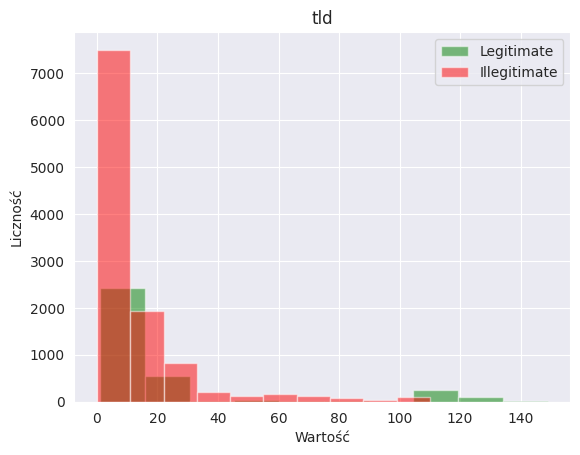

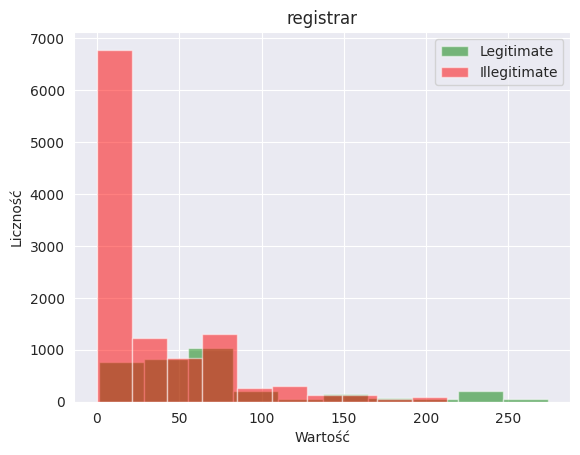

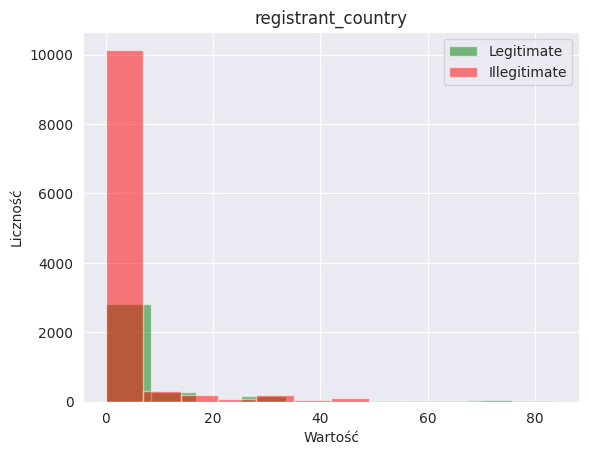

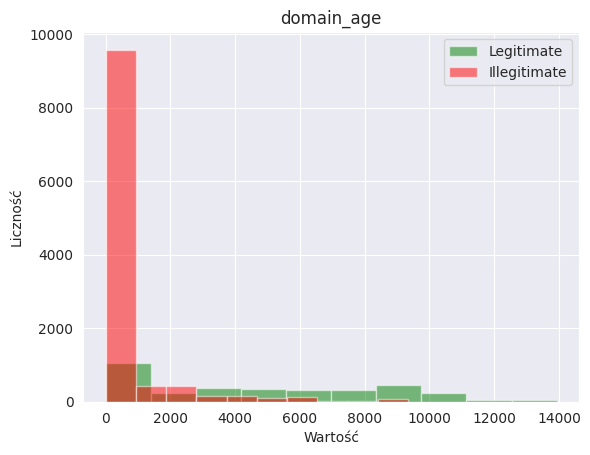

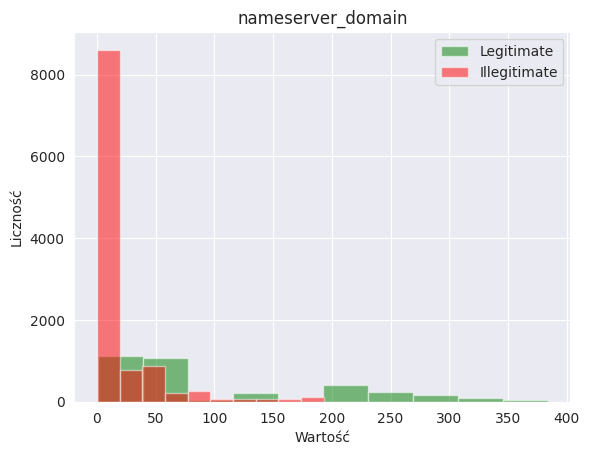

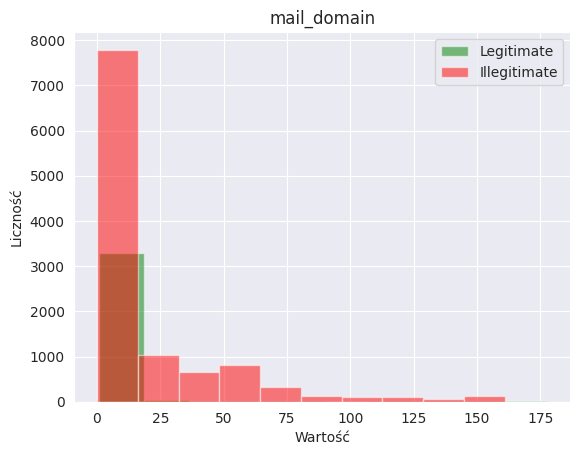

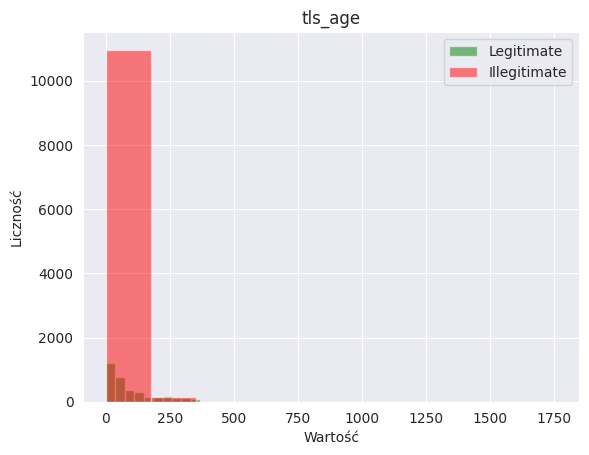

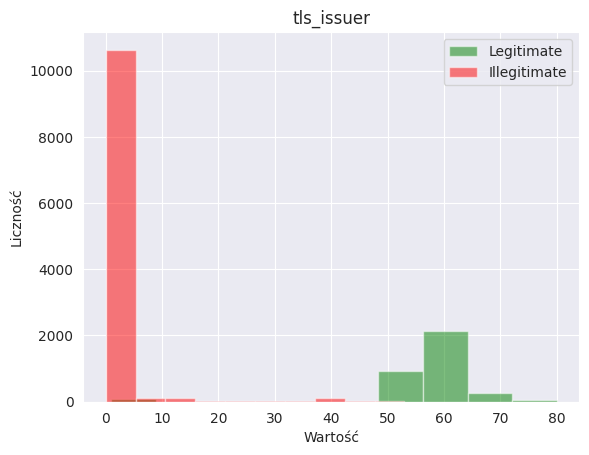

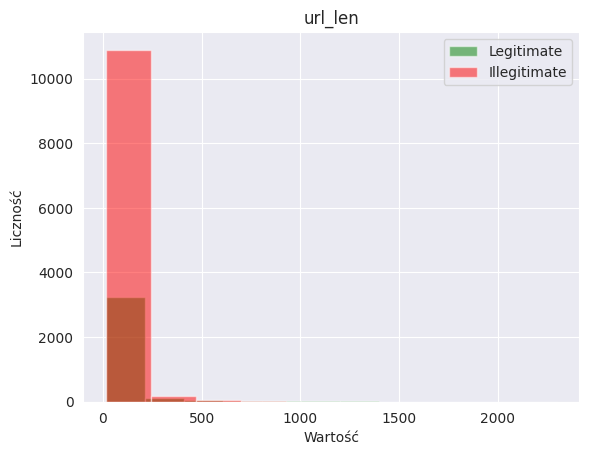

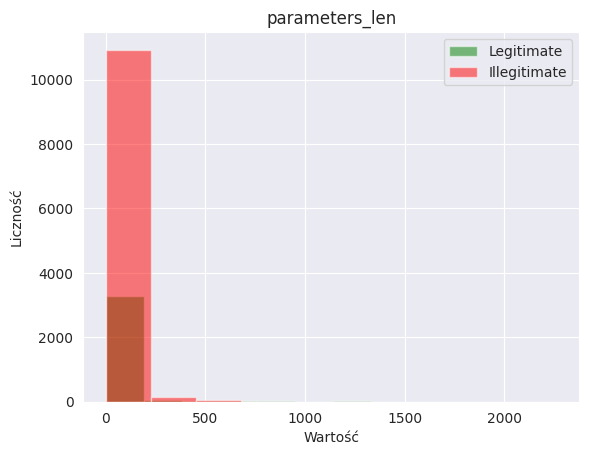

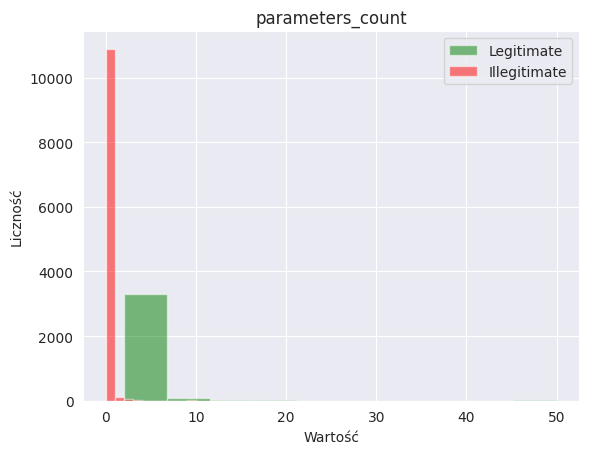

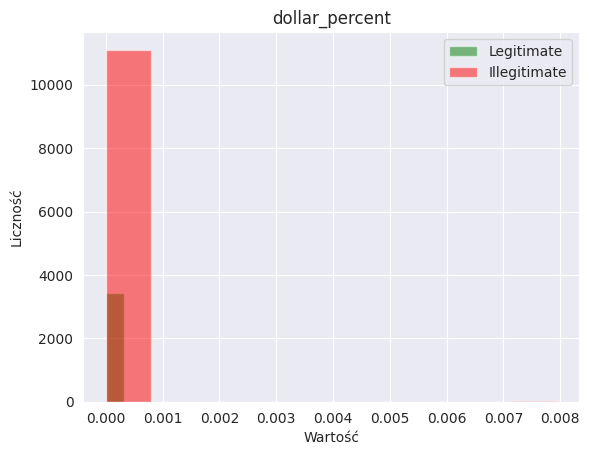

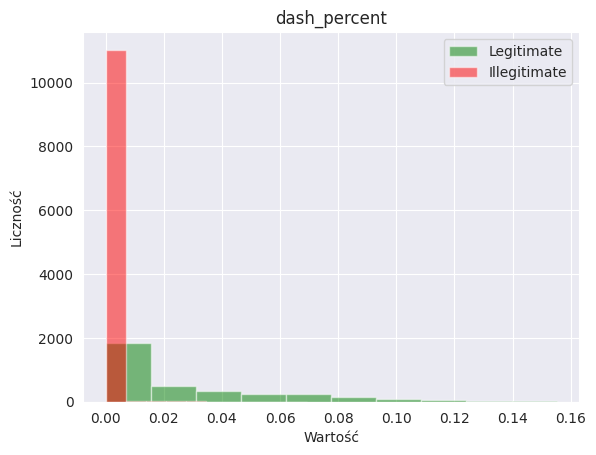

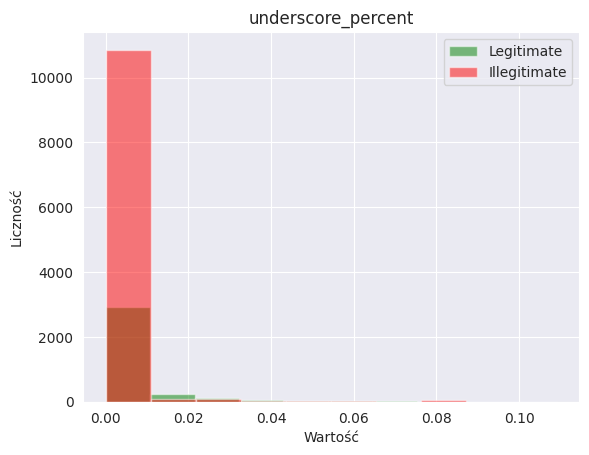

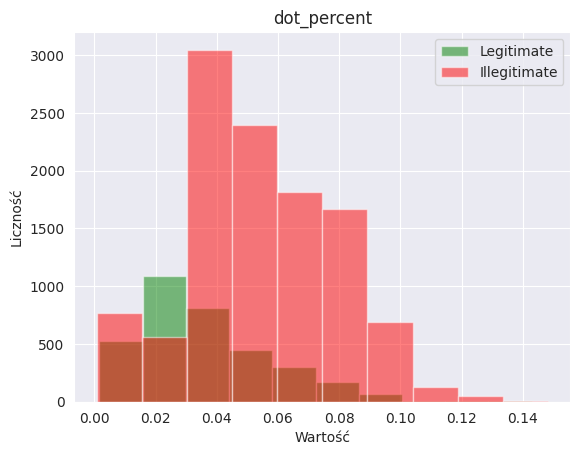

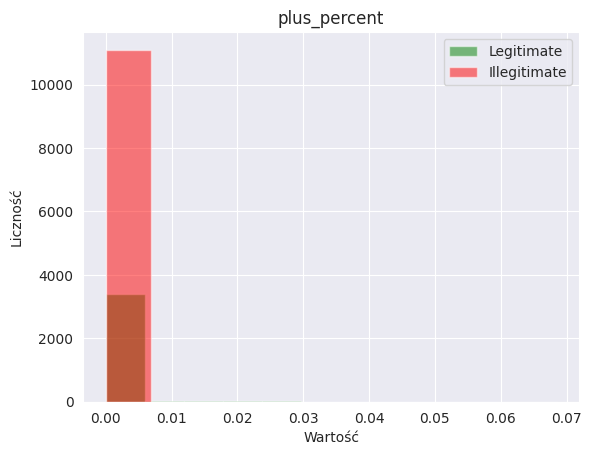

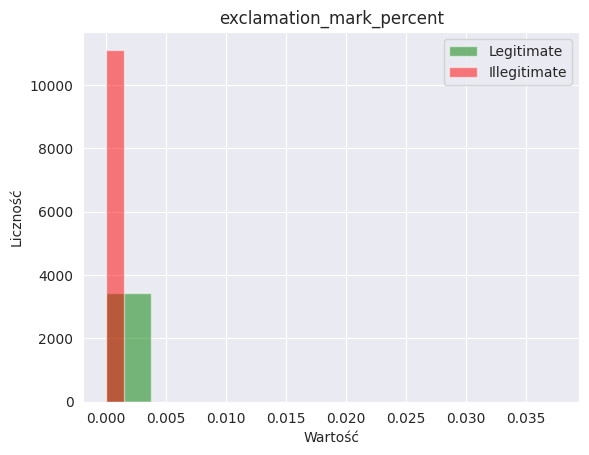

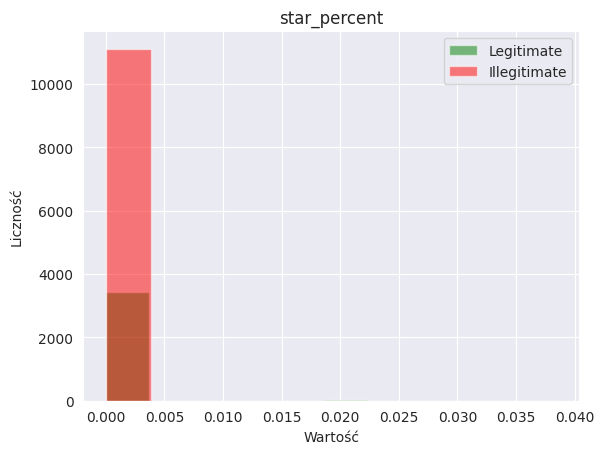

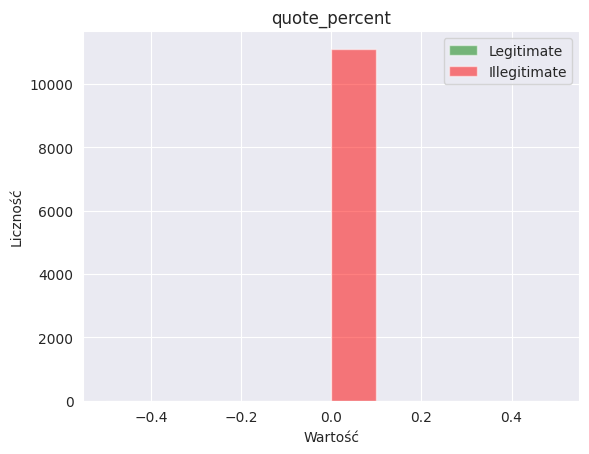

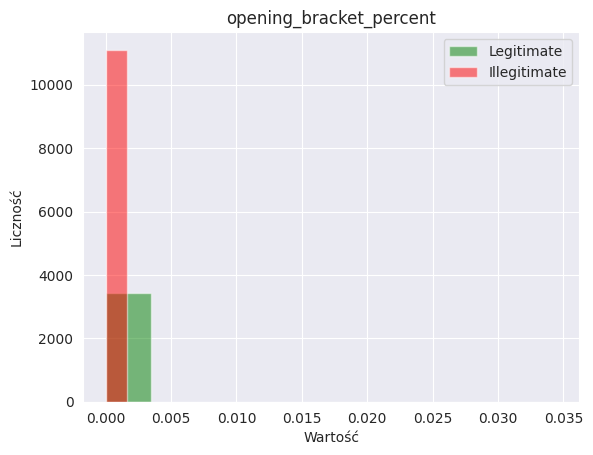

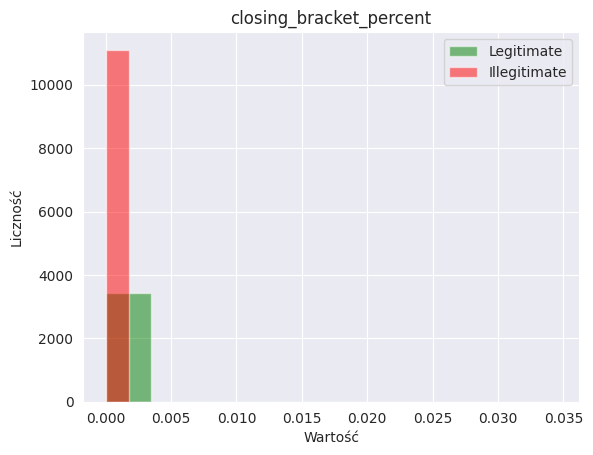

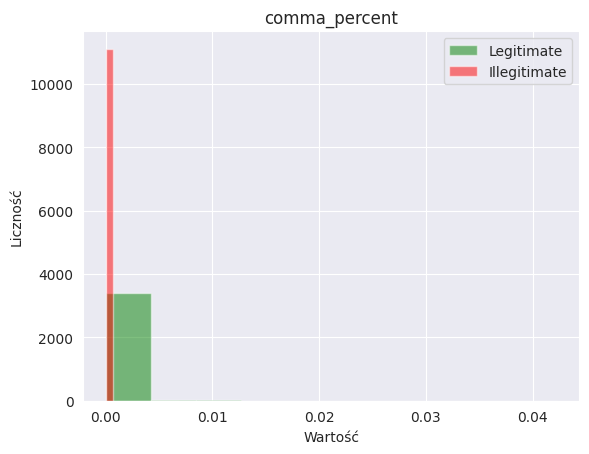

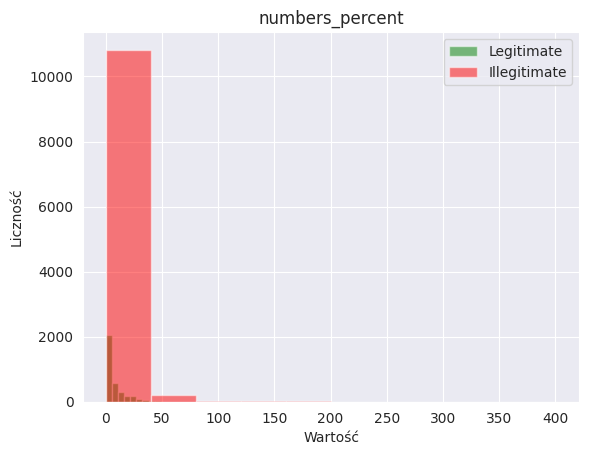

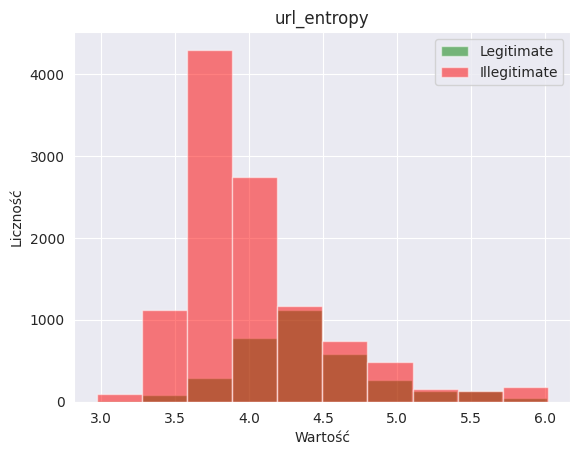

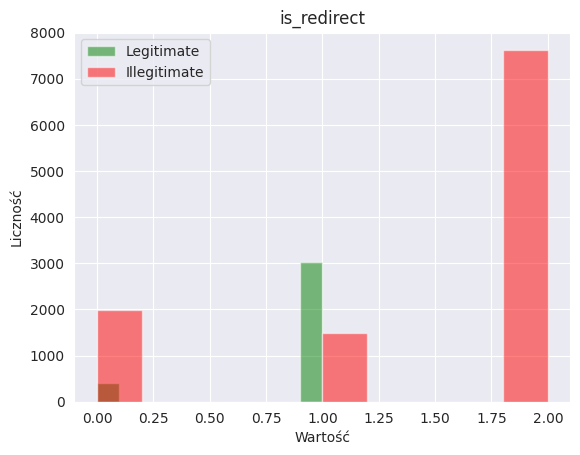

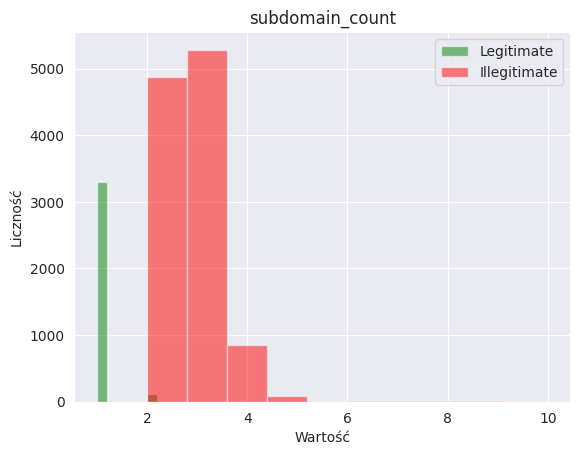

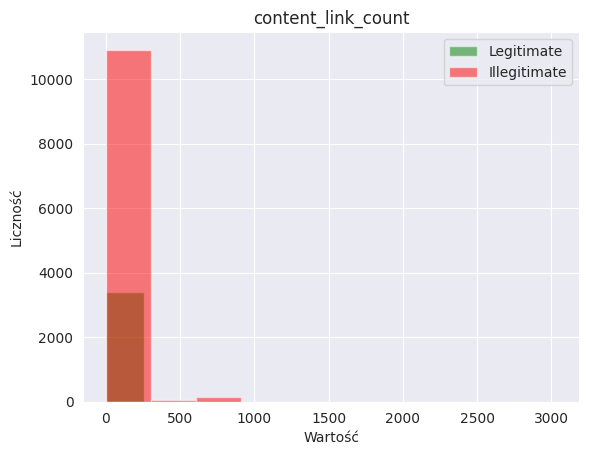

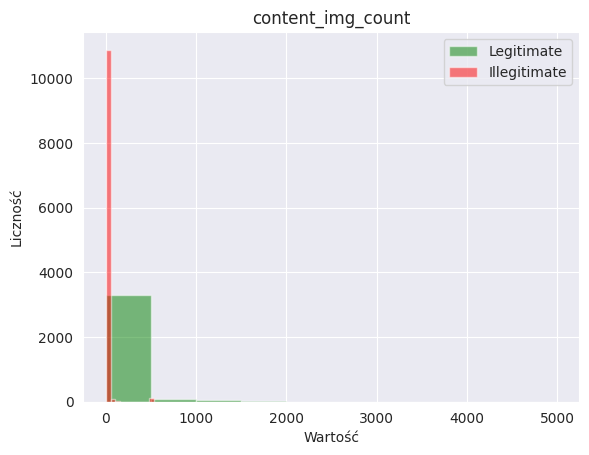

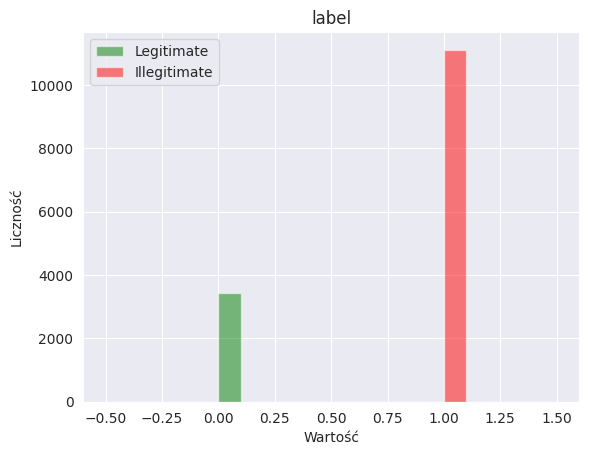

In [147]:
# Wyświetlanie histogramów dla każdej kolumny
for column in all_df_ml_ready_legit.columns:
    plt.figure()  # Tworzenie nowego wykresu dla każdej kolumny
    all_df_ml_ready_legit[column].hist(alpha=0.5, label='Legitimate', color='green')  # Zielone słupki dla danych "all_df_ml_ready_legit"
    all_df_ml_ready_illegit[column].hist(alpha=0.5, label='Illegitimate', color='red')  # Czerwone słupki dla danych "all_df_ml_ready_illegit"
    plt.title(column)  # Ustawienie tytułu wykresu jako nazwa kolumny
    plt.xlabel('Wartość')  # Etykieta osi x
    plt.ylabel('Liczność')  # Etykieta osi y
    plt.legend()  # Wyświetlenie legendy
    plt.show()  # Wyświetlenie wykresu


### Macierz korelacji dla danych legit i illegit

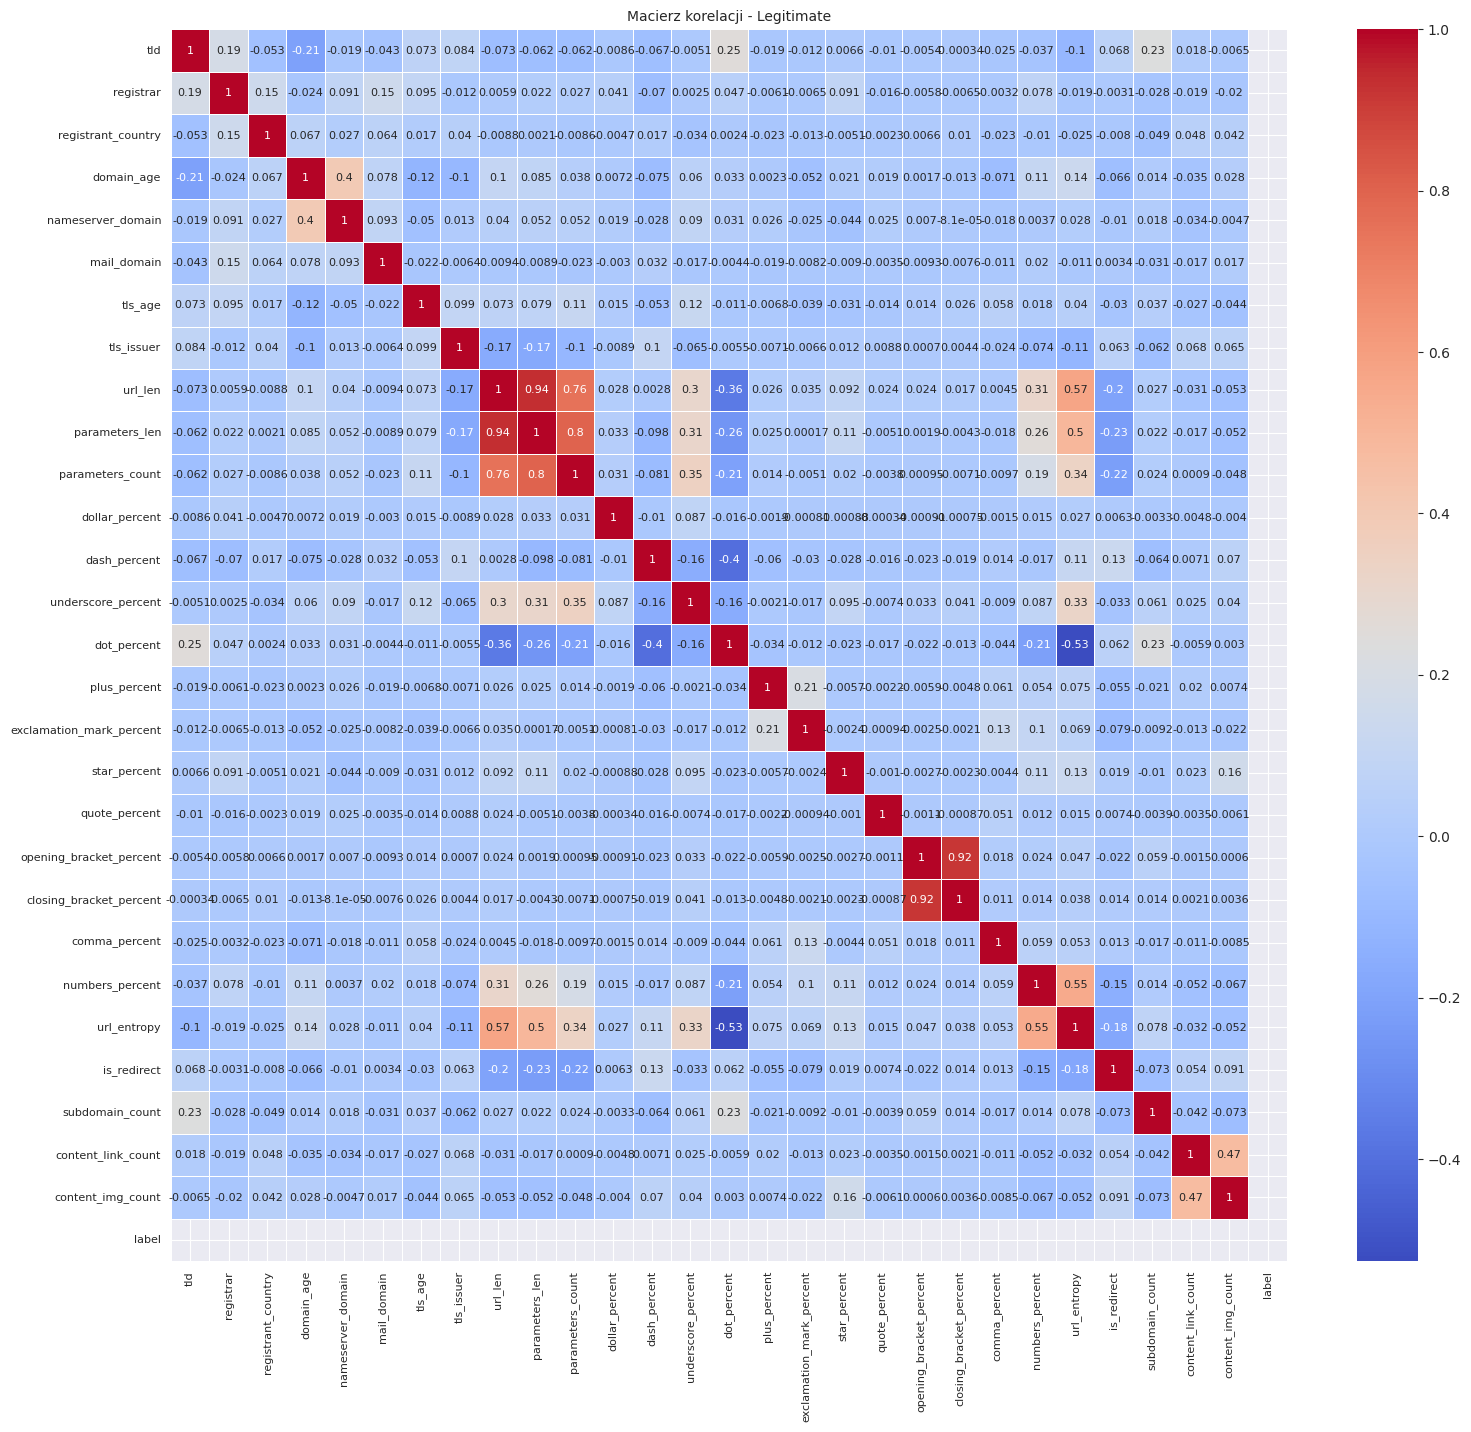

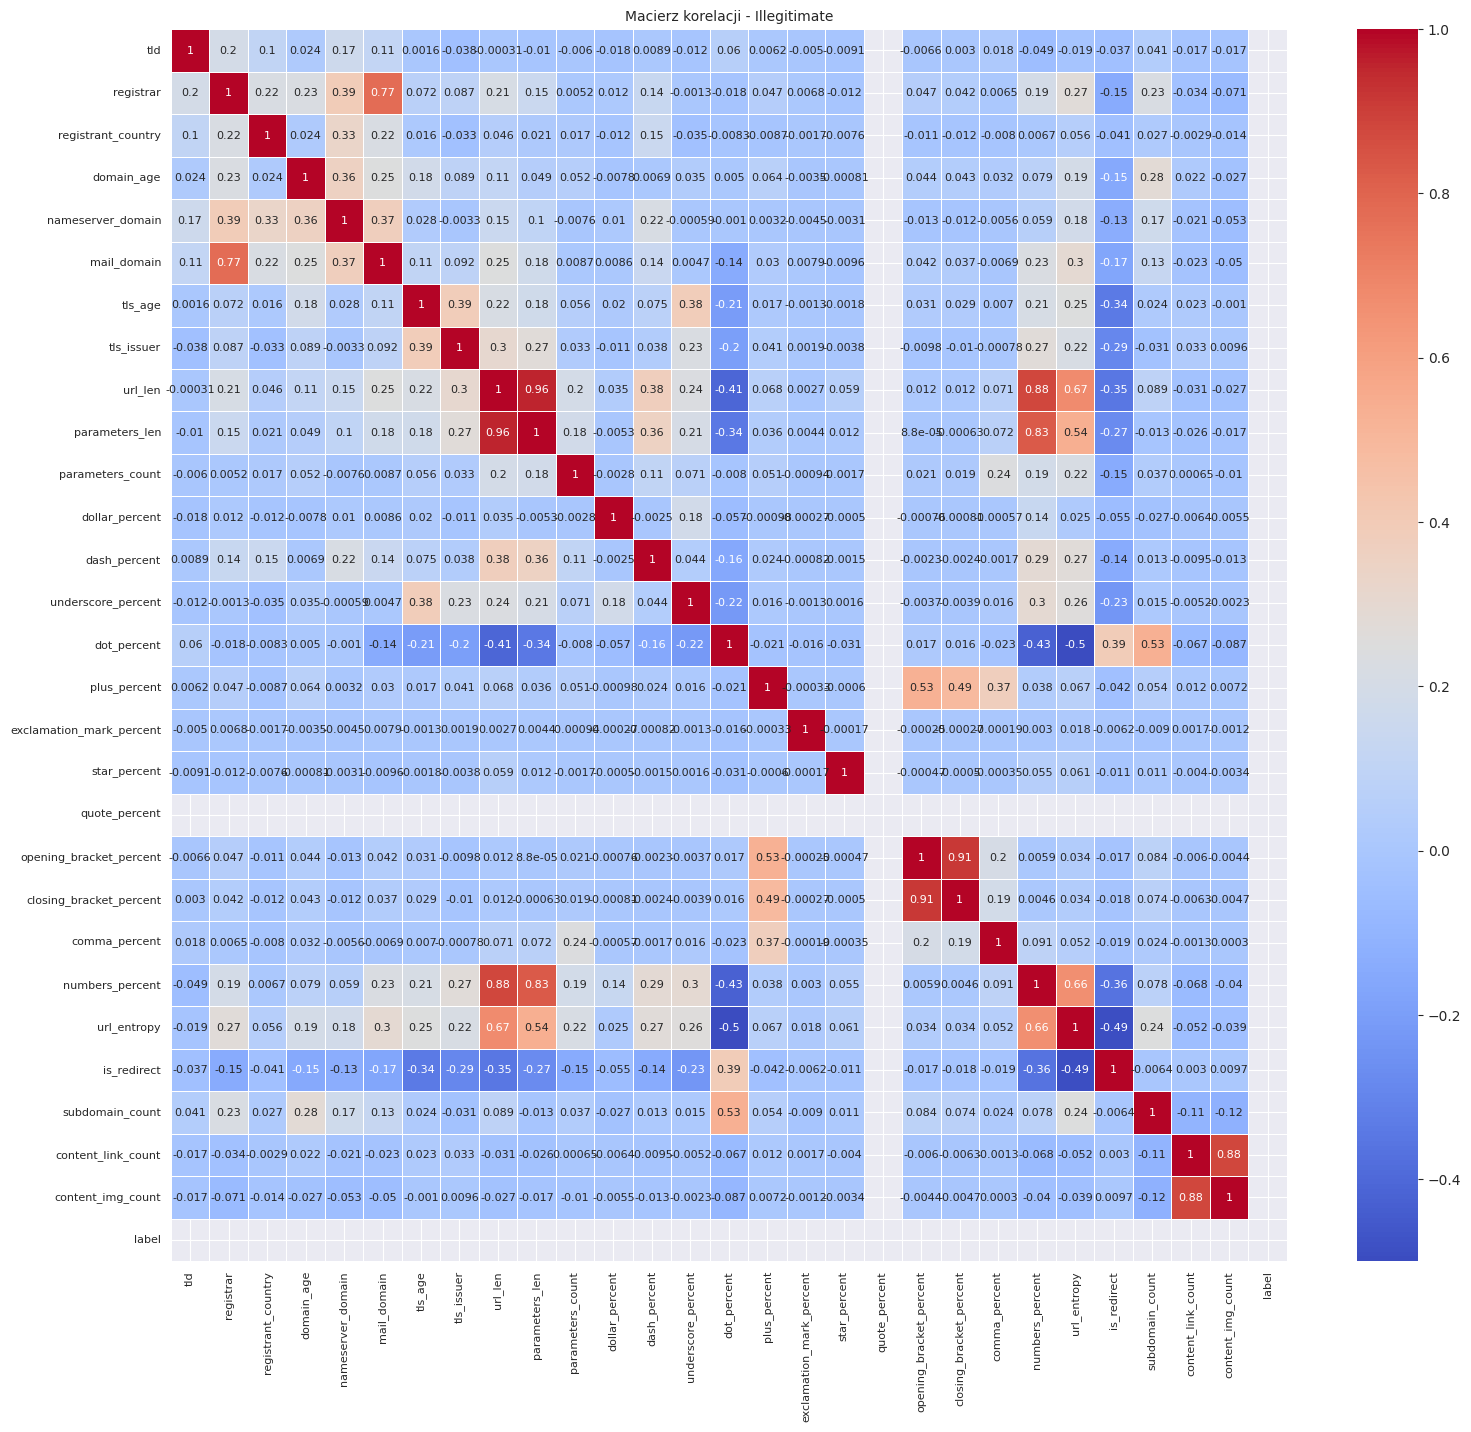

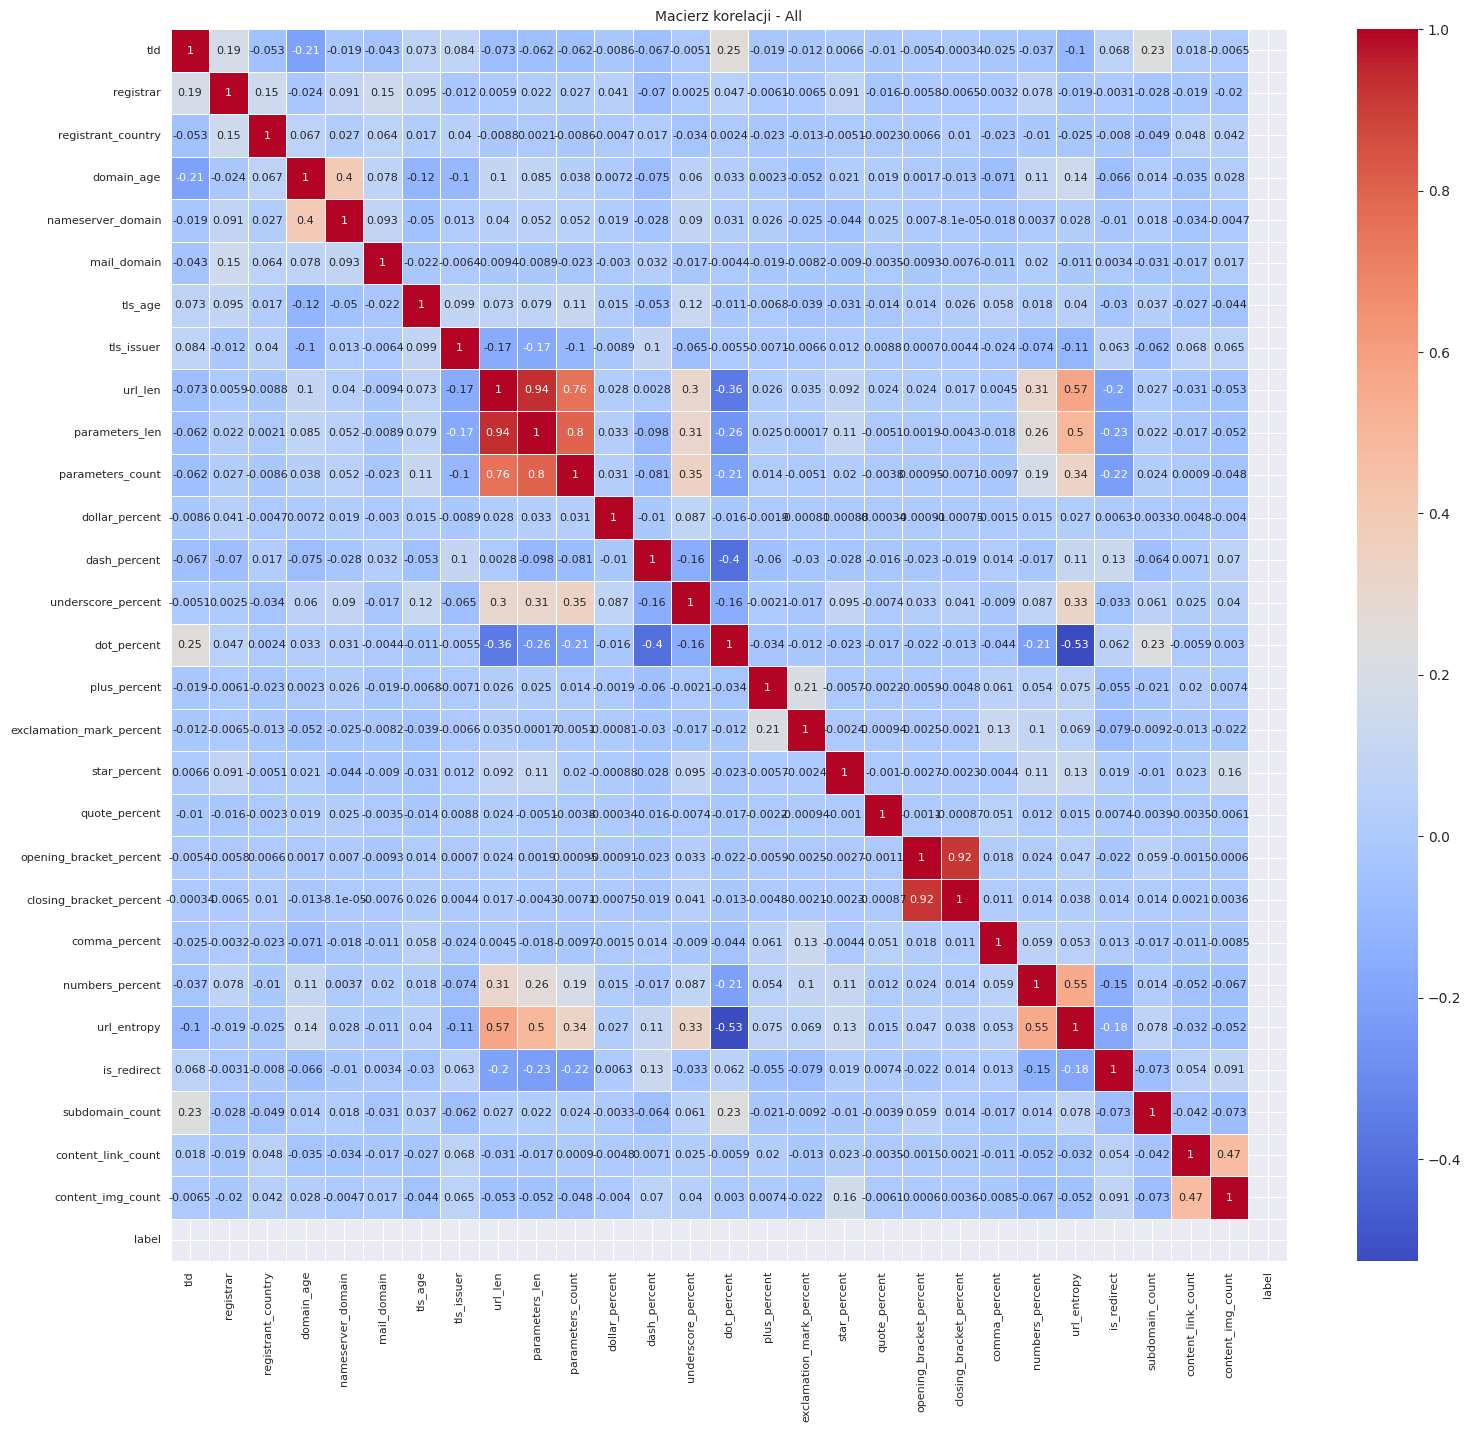

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obliczanie macierzy korelacji dla danych "all_df_ml_ready_legit"
corr_legit = all_df_ml_ready_legit.corr()

# Wyświetlanie macierzy korelacji dla danych "all_df_ml_ready_legit"
plt.figure(figsize=(18, 16))
sns.heatmap(corr_legit, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'fontsize': 8})
plt.title('Macierz korelacji - Legitimate', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Obliczanie macierzy korelacji dla danych "all_df_ml_ready_illegit"
corr_illegit = all_df_ml_ready_illegit.corr()

# Wyświetlanie macierzy korelacji dla danych "all_df_ml_ready_illegit"
plt.figure(figsize=(18, 16))
sns.heatmap(corr_illegit, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'fontsize': 8})
plt.title('Macierz korelacji - Illegitimate', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


# Wyświetlanie macierzy korelacji dla danych "all_df_ml_ready_illegit"

corr_all = all_df_ml_ready_legit.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr_all, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'fontsize': 8})
plt.title('Macierz korelacji - All', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


In [149]:
TRAIN_SAMPLES_FRACTION = 0.3
# Separate the features and target variable
features = all_df_ml_ready[all_df_ml_ready.columns.difference(['label'])]
classes = all_df_ml_ready['label']

# Split the data into training and testing datasets
features_train, features_test, classes_train, classes_test = train_test_split(features, classes, test_size=TRAIN_SAMPLES_FRACTION, random_state=42)

In [150]:
for model_name in AVAILABLE_MODELS:
    prediction_model = AVAILABLE_MODELS[model_name]
    predictions, model = build_model_return_predictions(prediction_model, features_train, classes_train, features_test)
    metrics = calculate_metrics(classes_test, predictions)
    print(model_name)
    print(metrics)

DECISION_TREE
{'accuracy': 0.9990836197021764, 'precision': 0.9990990990990991, 'recall': 0.9996995192307693, 'f1_score': 0.9993992189846801}
RANDOM_FOREST
{'accuracy': 0.9995418098510882, 'precision': 0.9993993993993994, 'recall': 1.0, 'f1_score': 0.99969960949234}
NEURAL_NETWORK
{'accuracy': 0.9947308132875143, 'precision': 0.9957995799579958, 'recall': 0.9972956730769231, 'f1_score': 0.9965470650052545}
K_NEIGHBORS
{'accuracy': 0.9876288659793815, 'precision': 0.9901197604790419, 'recall': 0.9936899038461539, 'f1_score': 0.9919016196760648}
SUPPORT_VECTOR_MACHINE
{'accuracy': 0.9390607101947308, 'precision': 0.9526907155529273, 'recall': 0.9681490384615384, 'f1_score': 0.9603576751117735}
ADABOOST
{'accuracy': 0.9997709049255441, 'precision': 0.99969960949234, 'recall': 1.0, 'f1_score': 0.9998497821841671}
NAIVE_BAYES
{'accuracy': 0.9857961053837343, 'precision': 0.9960510328068044, 'recall': 0.9852764423076923, 'f1_score': 0.9906344410876132}
QUADRATIC_DISCRIMINANT_ANALYSIS
{'accur

/home/shaggy17goo/.virtualenvs/ADAC_proj/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# TODO chłopaki
modele się mega przeuczają, trzeba sprawdzić przez jaki parametr tak jest, może obciąć zbiór wejściowy z jakiś gówno danych. Jak dane będą przefiltrowane i wciąż się będzie przeuczał to dropujecie kolumny sprawdzając czy jak ich nie ma to jest dużo gorzej, powinniście znaleźć jedną/parę po których usunięciu model stanie się gównem - o to chodzi